In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Loading Dataset

In [3]:
data=pd.read_csv("german_data_credit_cat.csv")
df=data.copy() 
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [5]:
print("Rows : {} \nColumns : {}".format(df.shape[0],df.shape[1]))

Rows : 1000 
Columns : 21


C:\Users\ldronden\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal status and sex', ylabel='count'>

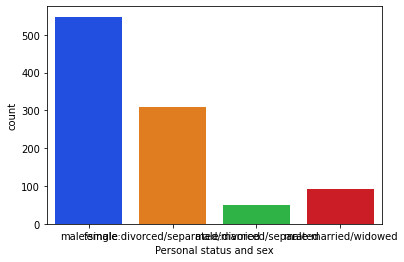

In [6]:
sns.countplot(df["Personal status and sex"],palette="bright")

In [7]:
numeric_describe=df.describe().T 
numeric_describe  

,count,mean,std,min,25%,50%,75%,max
Duration in month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment rate in percentage of disposable income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present residence since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age in years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Number of existing credits at this bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Number of people being liable to provide maintenance for,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [8]:
object_describe=df.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
Status of existing checking account,1000,4,no checking account,394
Credit history,1000,5,existing credits paid back duly till now,530
Purpose,1000,10,radio/television,280
Savings account/bonds,1000,5,<100 DM,603
Present employment since,1000,5,1<= < 4 years,339
Personal status and sex,1000,4,male:single,548
Other debtors / guarantors,1000,3,none,907
Property,1000,4,car or other,332
Other installment plans,1000,3,none,814
Housing,1000,3,own,713


In [9]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- Status of existing checking account-----
no checking account    394
<0 DM                  274
0 <= <200 DM           269
>= 200 DM               63
Name: Status of existing checking account, dtype: int64
----- Credit history-----
existing credits paid back duly till now    530
critical account                            293
delay in paying off                          88
all credits at this bank paid back duly      49
no credits taken                             40
Name: Credit history, dtype: int64
----- Purpose-----
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: Purpose, dtype: int64
----- Savings account/bonds-----
<100 DM               603
no savings account    183
100 <= <500 DM        103
500 <= < 1000 DM       63
>= 1000 DM             48
Name: Sa

In [10]:
df.isnull().sum() 

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

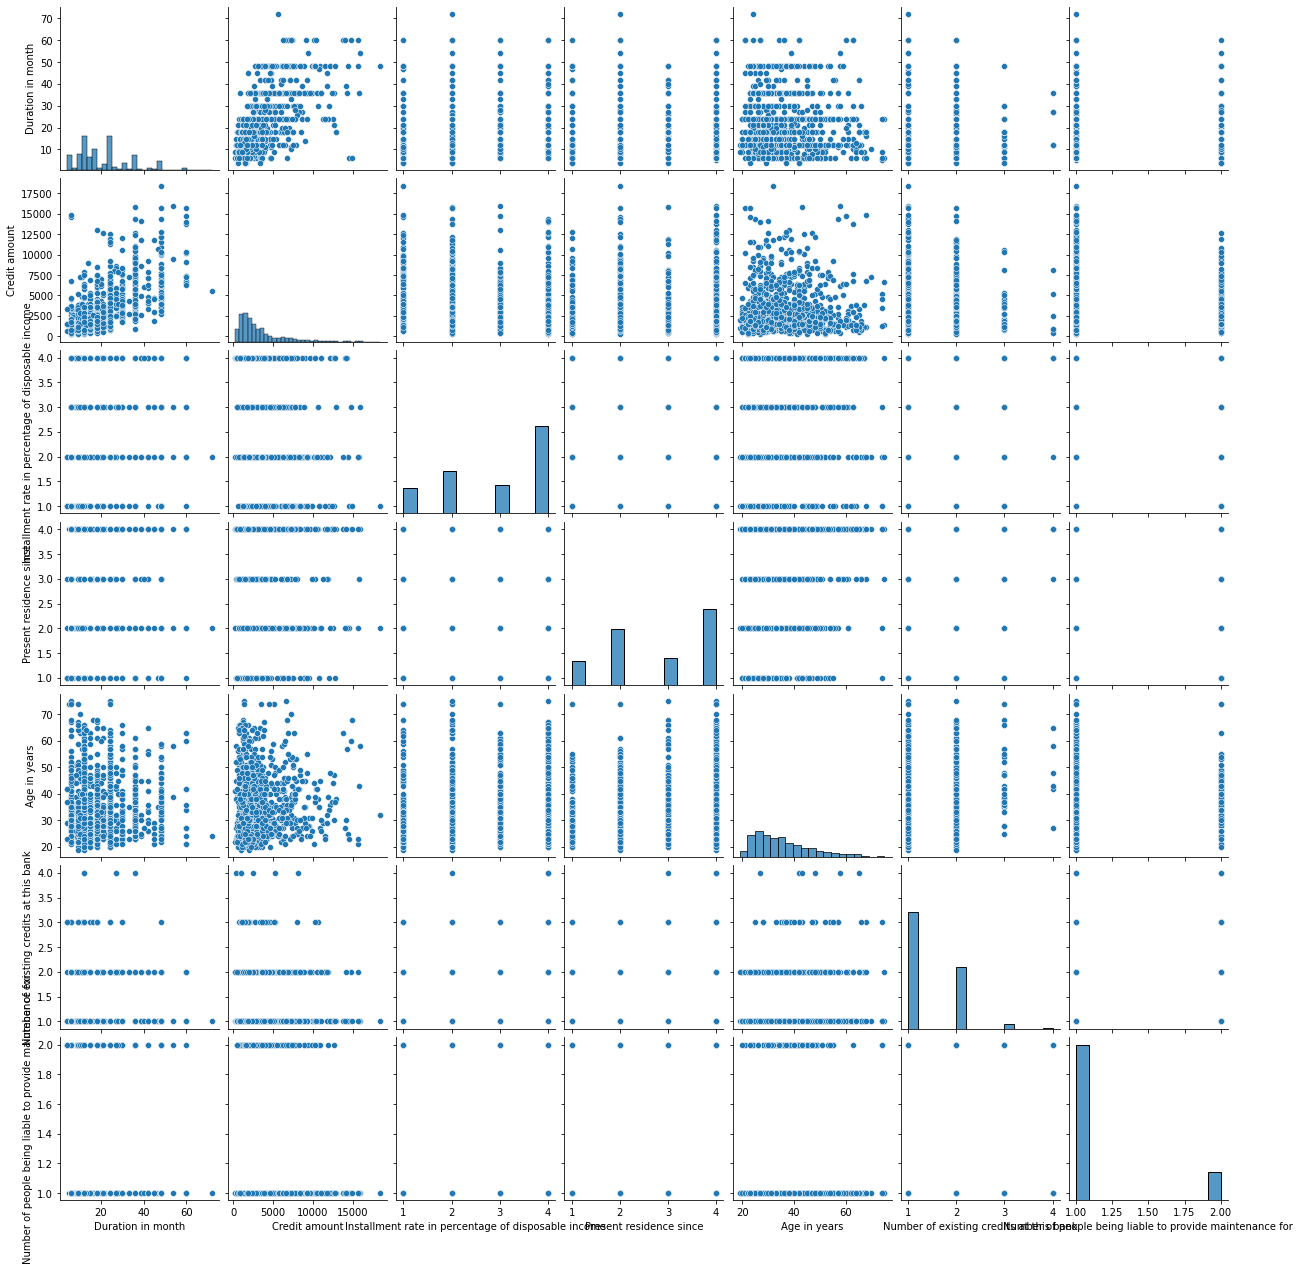

In [11]:
sns.pairplot(df) 

In [12]:
df.dtypes 

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

In [13]:
df.corr() 

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
Duration in month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
Credit amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
Installment rate in percentage of disposable income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
Present residence since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
Age in years,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
Number of existing credits at this bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
Number of people being liable to provide maintenance for,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


C:\Users\ldronden\AppData\Local\Temp\ipykernel_9992\1642969173.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


<AxesSubplot:>

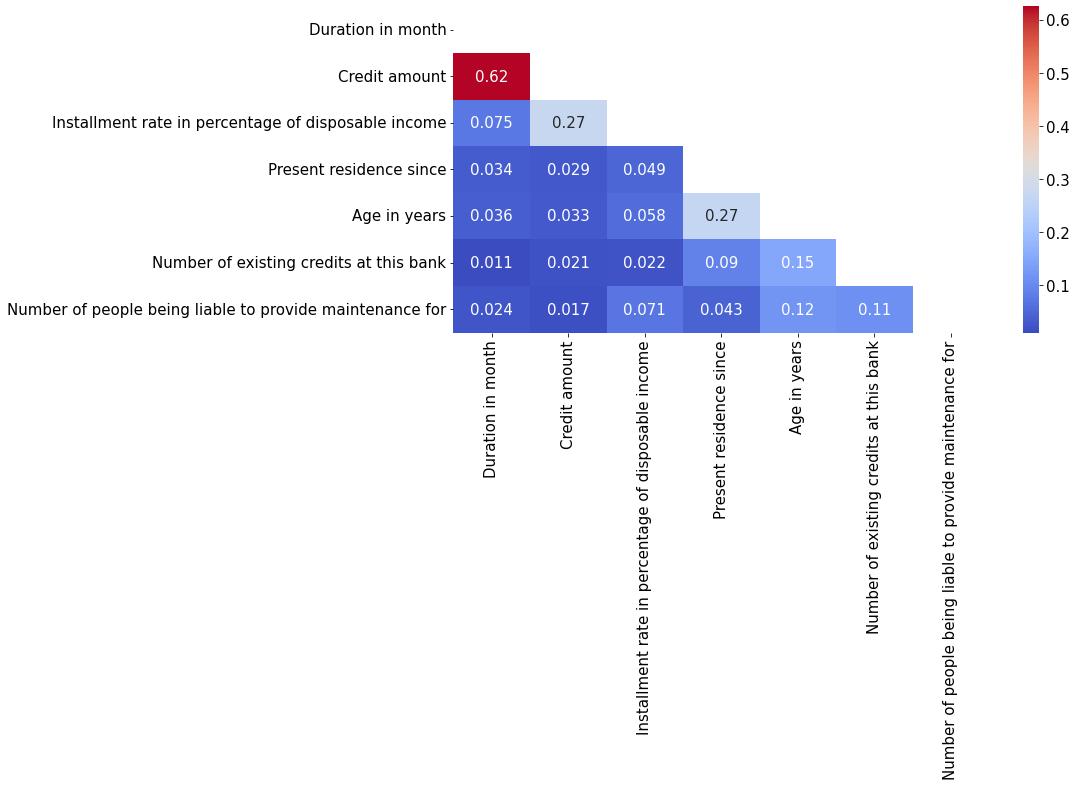

In [14]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

### Preprocessing

In [14]:
'''
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

df["Savings account/bonds"] = df["Savings account/bonds"].apply(SC_LabelEncoder)
df["Status of existing checking account"] = df["Status of existing checking account"].apply(SC_LabelEncoder)
df.head()
'''

'\ndef SC_LabelEncoder(text):\n    if text == "little":\n        return 1\n    elif text == "moderate":\n        return 2\n    elif text == "quite rich":\n        return 3\n    elif text == "rich":\n        return 4\n    else:\n        return 0\n\ndf["Savings account/bonds"] = df["Savings account/bonds"].apply(SC_LabelEncoder)\ndf["Status of existing checking account"] = df["Status of existing checking account"].apply(SC_LabelEncoder)\ndf.head()\n'

In [15]:
def visualize_distribution(attr):

    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

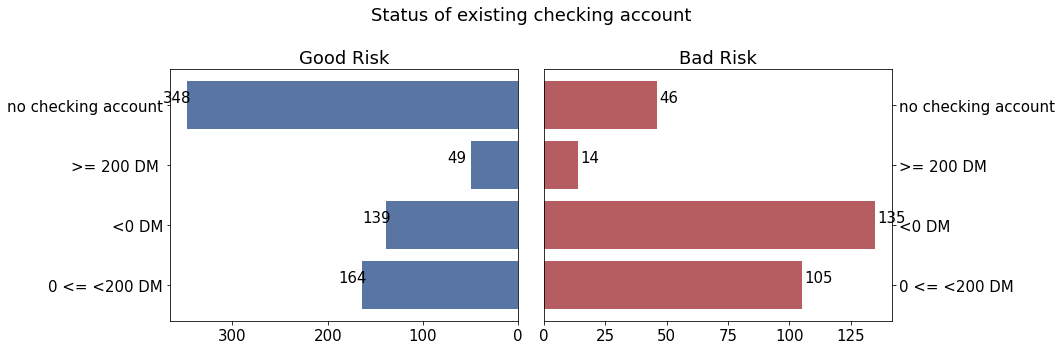

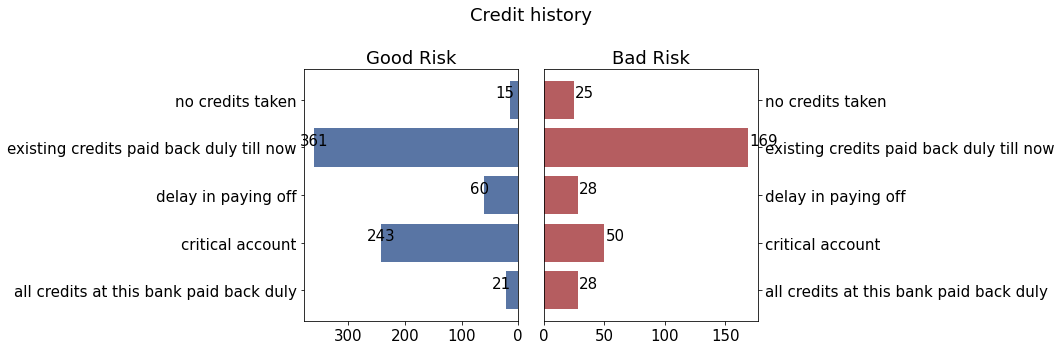

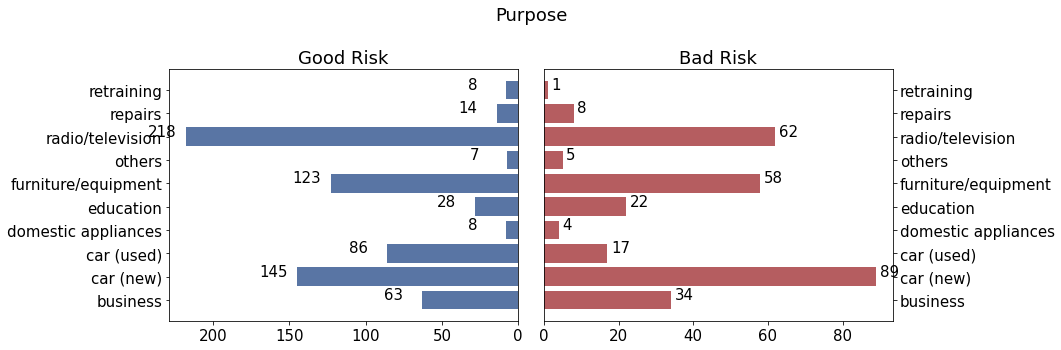

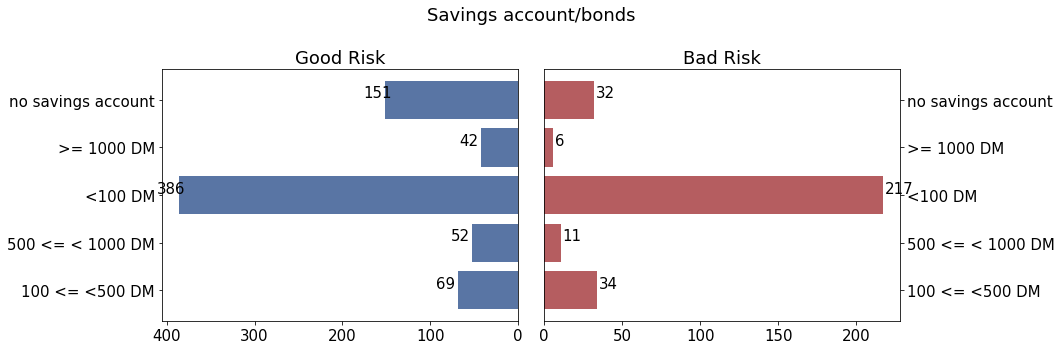

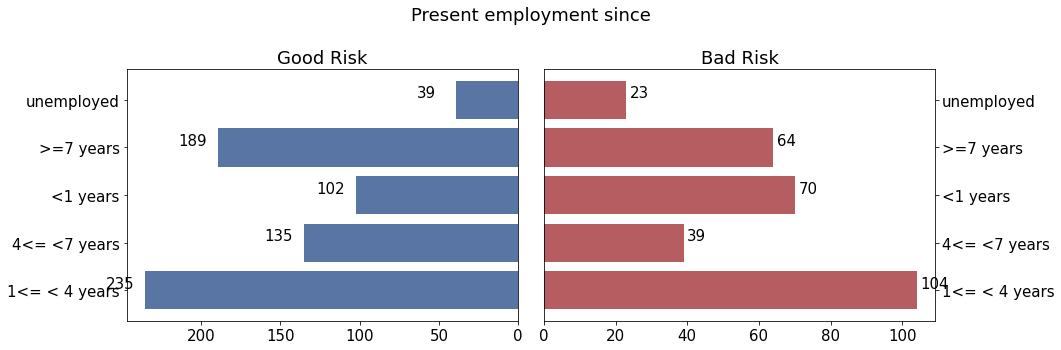

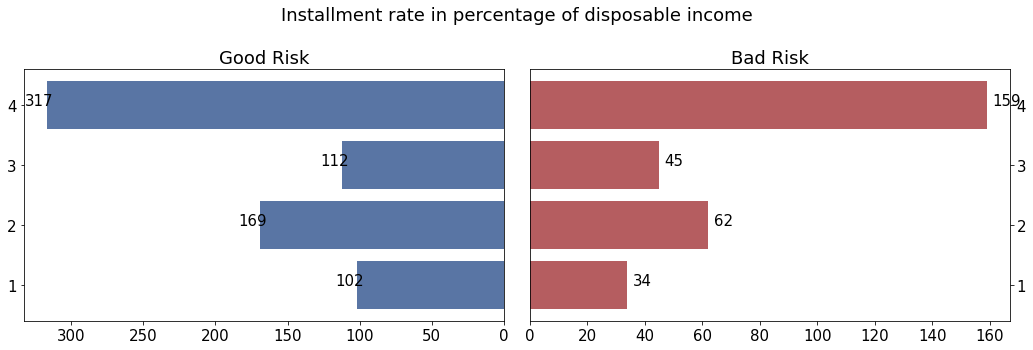

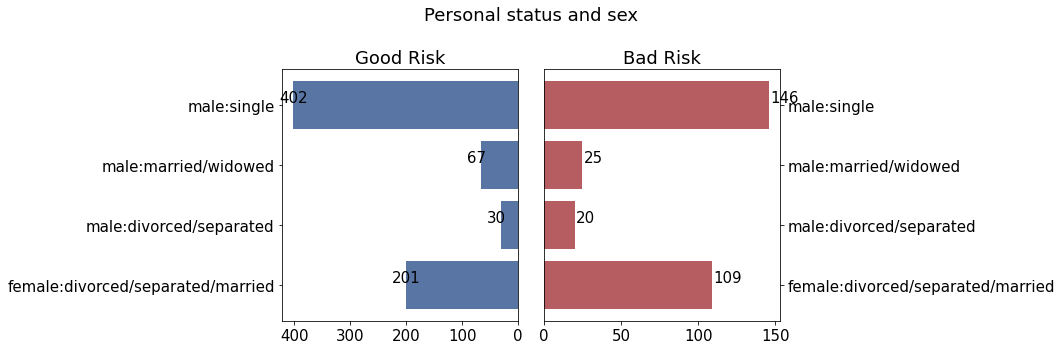

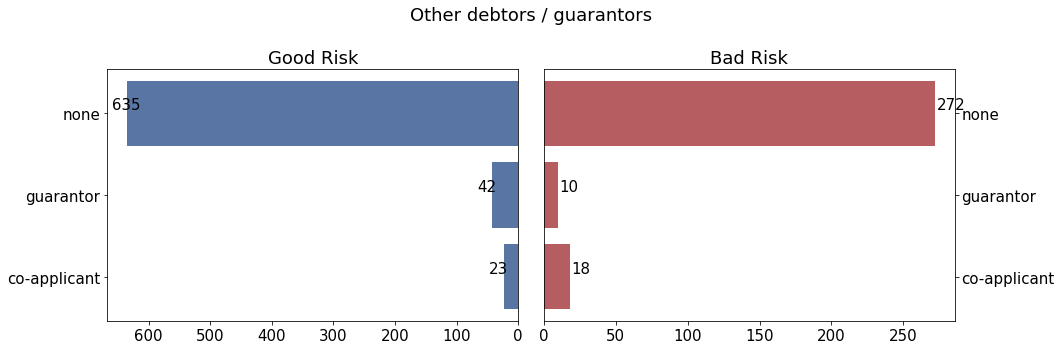

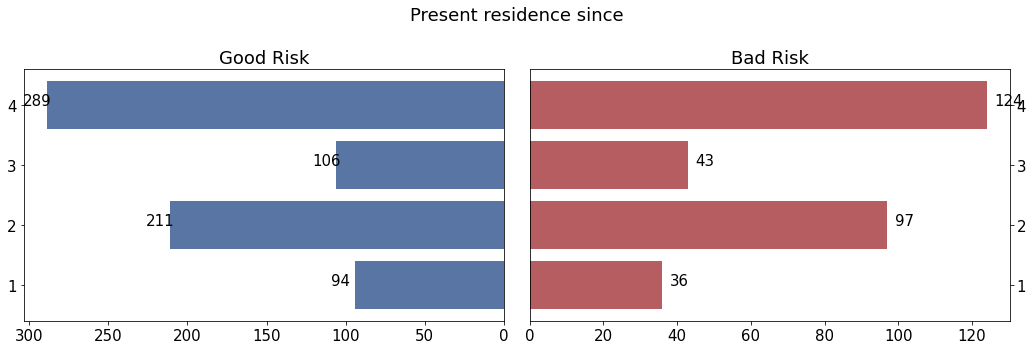

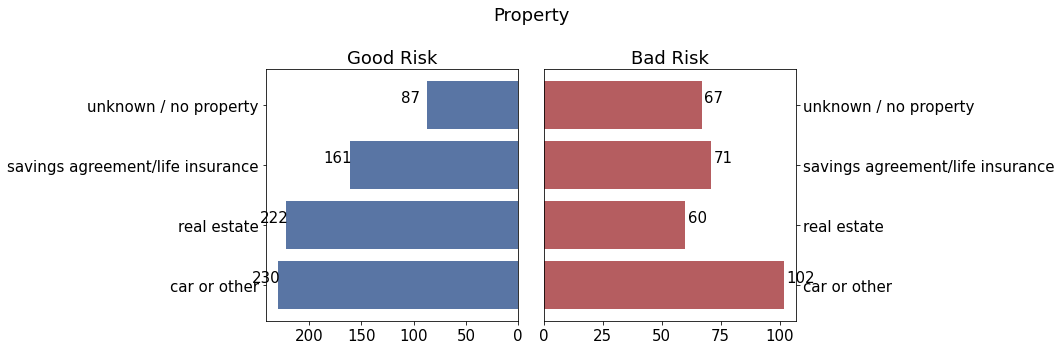

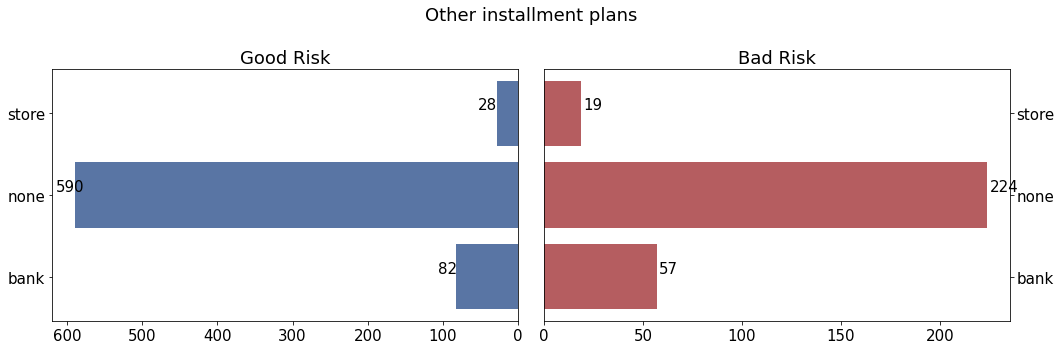

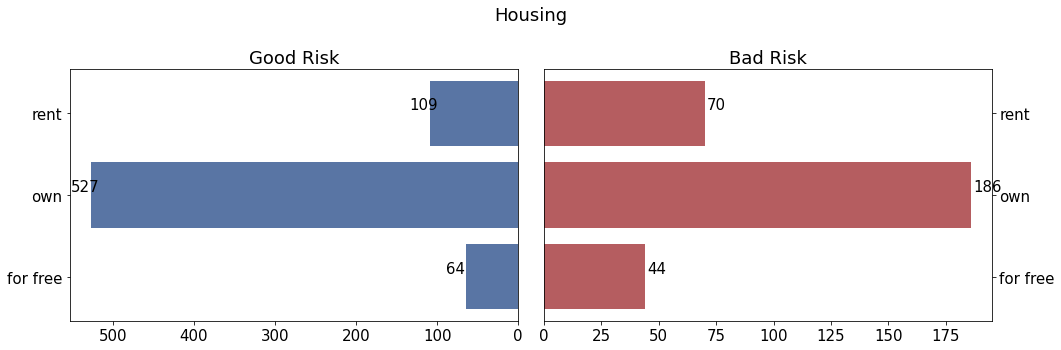

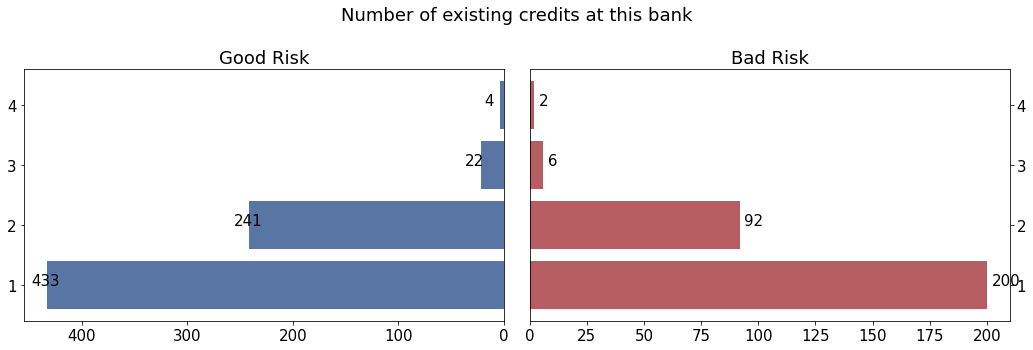

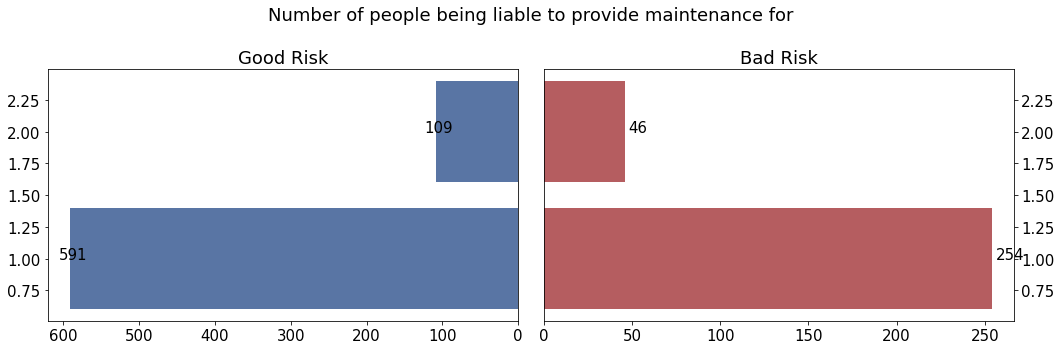

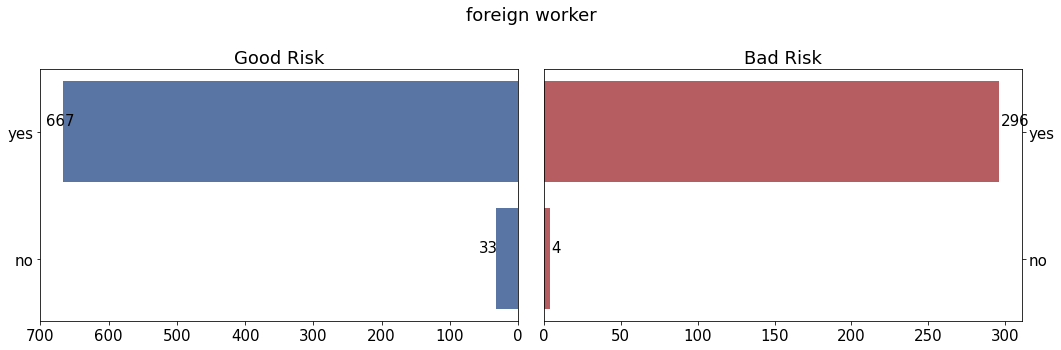

In [16]:
visualize_distribution("Status of existing checking account")
visualize_distribution("Credit history")
visualize_distribution("Purpose")
visualize_distribution("Savings account/bonds")
visualize_distribution("Present employment since")
visualize_distribution("Installment rate in percentage of disposable income")
visualize_distribution("Personal status and sex")
visualize_distribution("Other debtors / guarantors")
visualize_distribution("Present residence since")
visualize_distribution("Property")
visualize_distribution("Other installment plans")
visualize_distribution("Housing")
visualize_distribution("Number of existing credits at this bank")
visualize_distribution("Number of people being liable to provide maintenance for")
visualize_distribution("foreign worker")

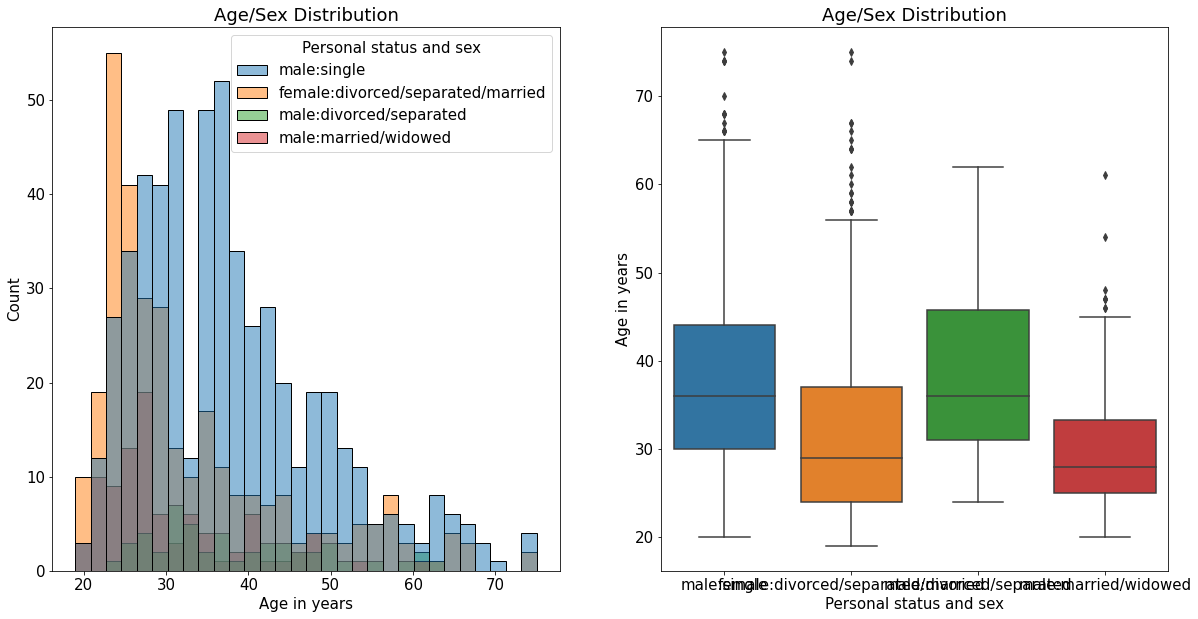

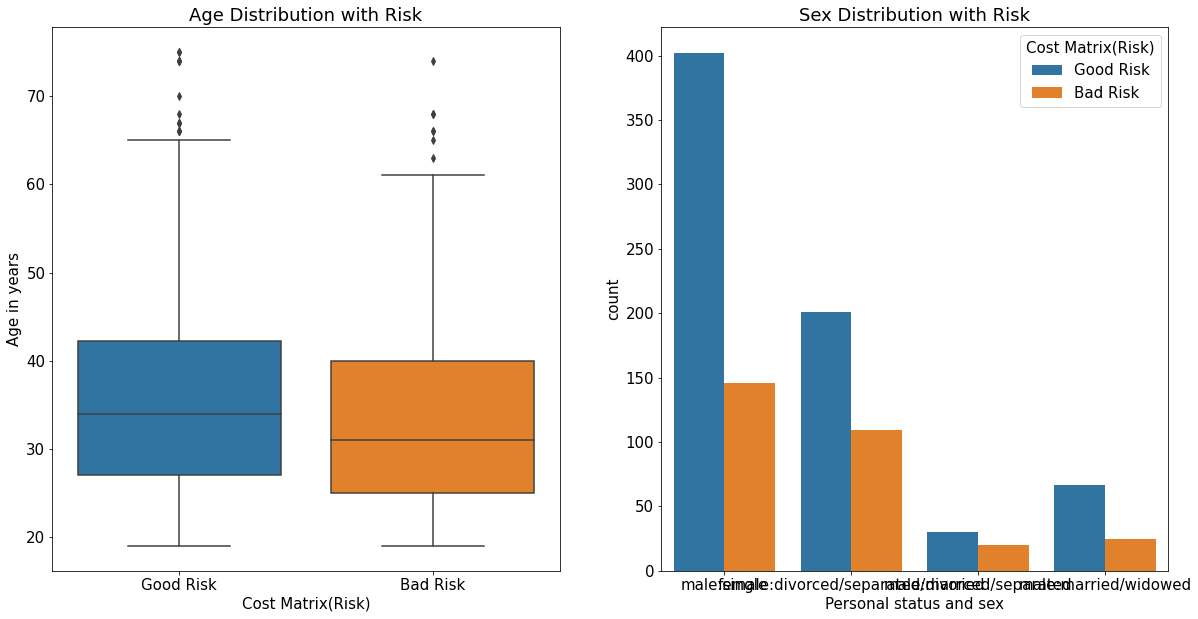

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.histplot(df, x='Age in years', bins=30, hue="Personal status and sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Personal status and sex", y="Age in years", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.boxplot(data=df, x='Cost Matrix(Risk)', y='Age in years', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Personal status and sex", hue="Cost Matrix(Risk)", ax=ax[1]).set_title("Sex Distribution with Risk");

**Analysis:** 
- Age does not affect the risk rating much. 
- Males take more count of credit from Bank.
- Males have lower percentage of bad rating than woman.

In [20]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


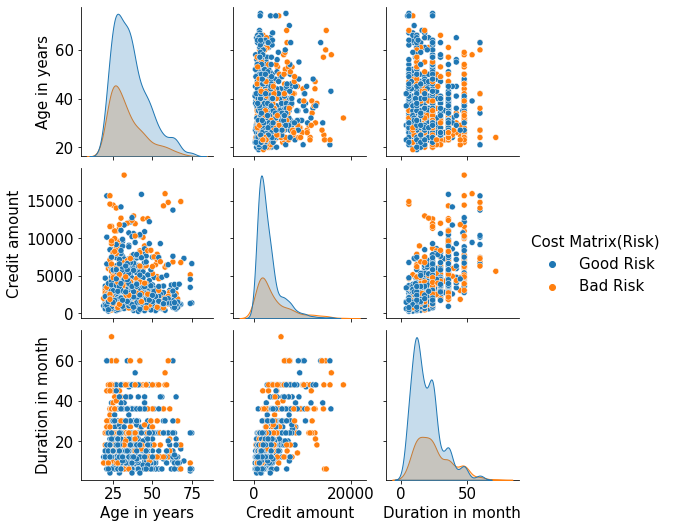

In [21]:
sns.pairplot(df[['Age in years', 'Job', 'Housing', 'Savings account/bonds', 
                 'Status of existing checking account', 'Credit amount', 'Duration in month', 
                 "Personal status and sex", "Cost Matrix(Risk)"]], hue="Cost Matrix(Risk)");

C:\Users\ldronden\AppData\Local\Temp\ipykernel_9992\2179110367.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


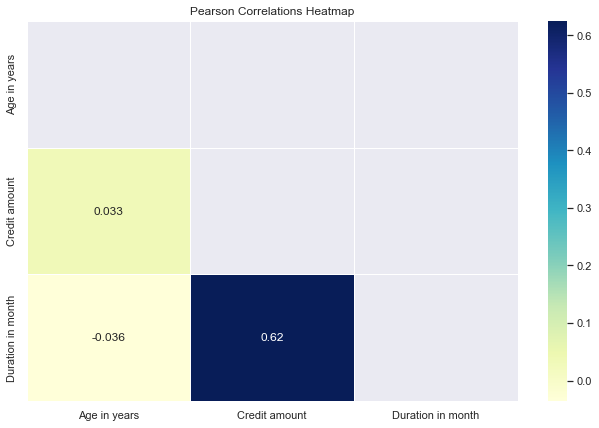

In [22]:
corr = df[['Age in years', 'Job', 'Housing', 'Savings account/bonds', 'Status of existing checking account', 
           'Credit amount', 'Duration in month']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [23]:
# Create marital status and gender from Personal status and sex
df["Personal status and sex"].value_counts()

male:single                          548
female:divorced/separated/married    310
male:married/widowed                  92
male:divorced/separated               50
Name: Personal status and sex, dtype: int64

In [24]:
df[['gender','marital_status']] = df ["Personal status and sex"].str.split(":", expand=True)

In [25]:
print(df["gender"].value_counts())
print("\n", df["marital_status"].value_counts())

male      690
female    310
Name: gender, dtype: int64

 single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
Name: marital_status, dtype: int64


In [26]:
 df.drop(['Personal status and sex'], axis=1, inplace= True)

In [27]:
df=pd.get_dummies(df,columns=["gender"],drop_first=True)
df=pd.get_dummies(df,columns=["marital_status"], drop_first=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Other debtors / guarantors   

In [29]:
# Create age_25plus, 1 if age >= 25, 0 else
# Like: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/05_recode.html

df['age_25plus'] = np.where(df['Age in years']>= 25, 1, 0)
print (df.groupby(["age_25plus"]).max("Age in years")["Age in years"])
df.drop(['Age in years'], axis=1, inplace= True)

age_25plus
0    24
1    75
Name: Age in years, dtype: int64


In [30]:
for col in df.columns:
    if (df[col].dtype) == "object" and col != "Cost Matrix(Risk)":
        df=pd.get_dummies(df,columns=[col],drop_first=False)

In [31]:
print (df["Cost Matrix(Risk)"].value_counts())
df["good_risk"] =  np.where(df["Cost Matrix(Risk)"] == "Good Risk", 1, 0)
print (df["good_risk"].value_counts())
df.drop(["Cost Matrix(Risk)"], axis=1, inplace= True)

Good Risk    700
Bad Risk     300
Name: Cost Matrix(Risk), dtype: int64
1    700
0    300
Name: good_risk, dtype: int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Duration in month                                         1000 non-null   int64
 1   Credit amount                                             1000 non-null   int64
 2   Installment rate in percentage of disposable income       1000 non-null   int64
 3   Present residence since                                   1000 non-null   int64
 4   Number of existing credits at this bank                   1000 non-null   int64
 5   Number of people being liable to provide maintenance for  1000 non-null   int64
 6   gender_male                                               1000 non-null   uint8
 7   marital_status_divorced/separated                         1000 non-null   uint8
 8   marital_status_divorced/separated/marri

cols_to_delete = ["Status of existing checking account_no checking account", #1
                  "Credit history_no credits taken",                         #2
                  "Purpose_others",                                          #3
                  "Savings account/bonds_no savings account",                #4
                  "Present employment since_unemployed",                     #5
                  "Other debtors / guarantors_none",                         #6
                  "Property_unknown / no property",                          #7
                  "Other installment plans_none",                            #8
                  "Housing_for free",                                        #9
                  "Job_unemployed/ unskilled  - non-resident",               #10
                  "Telephone_none",                                          #11
                  "Cost Matrix(Risk)_Bad Risk",                              #12
                  "gender_female",                                           #13
                  "marital_status_single"]                                   #14
df_new.drop(cols_to_delete, axis=1, inplace= True)

In [33]:
df.shape

(1000, 63)

In [35]:

df.to_csv("german_credit_data_prepared.csv", index = False)

In [37]:
df_check=pd.read_csv("german_credit_data_prepared.csv")
df_check.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Number of existing credits at this bank,Number of people being liable to provide maintenance for,gender_male,marital_status_divorced/separated,marital_status_divorced/separated/married,marital_status_married/widowed,...,Housing_rent,Job_management/ highly qualified employee,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,Telephone_yes,foreign worker_no,foreign worker_yes,good_risk
0,6,1169,4,4,2,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1
1,48,5951,2,2,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,1,2,1,0,0,0,...,0,0,0,0,1,1,0,0,1,1
3,42,7882,2,4,1,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
4,24,4870,3,4,2,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [38]:
print(df_check.describe())

       Duration in month  Credit amount  \
count        1000.000000    1000.000000   
mean           20.903000    3271.258000   
std            12.058814    2822.736876   
min             4.000000     250.000000   
25%            12.000000    1365.500000   
50%            18.000000    2319.500000   
75%            24.000000    3972.250000   
max            72.000000   18424.000000   

       Installment rate in percentage of disposable income  \
count                                        1000.000000     
mean                                            2.973000     
std                                             1.118715     
min                                             1.000000     
25%                                             2.000000     
50%                                             3.000000     
75%                                             4.000000     
max                                             4.000000     

       Present residence since  Number of existing cr

In [39]:
print(df_check.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Duration in month                                         1000 non-null   int64
 1   Credit amount                                             1000 non-null   int64
 2   Installment rate in percentage of disposable income       1000 non-null   int64
 3   Present residence since                                   1000 non-null   int64
 4   Number of existing credits at this bank                   1000 non-null   int64
 5   Number of people being liable to provide maintenance for  1000 non-null   int64
 6   gender_male                                               1000 non-null   int64
 7   marital_status_divorced/separated                         1000 non-null   int64
 8   marital_status_divorced/separated/marri